In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

data_frame = pd.read_csv("wine_clean.csv")
data_frame.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [53]:
data_frame.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,13.031412,2.372529,2.365588,19.393529,98.488235,2.288588,2.013824,0.362294,1.568882,5.138882,0.950212,2.601294,748.682353,1.941176
std,0.811147,1.126030,0.243590,3.038961,12.240798,0.629145,0.982868,0.123787,0.550059,2.328897,0.229733,0.713145,319.407114,0.789771
min,11.030000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.370000,1.610000,2.222500,17.200000,88.000000,1.705000,1.125000,0.270000,1.242500,3.255000,0.772500,1.922500,500.500000,1.000000
50%,13.060000,1.870000,2.360000,19.500000,97.500000,2.355000,2.120000,0.340000,1.535000,4.850000,0.960000,2.780000,666.000000,2.000000
75%,13.705000,3.157500,2.540000,21.500000,106.000000,2.800000,2.875000,0.430000,1.937500,6.287500,1.117500,3.170000,1008.750000,3.000000
max,14.830000,5.800000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Seleccionamos datos al azar los cuales seran utilizados posteriormente para verificar el cluster al cual pertenecen

In [54]:
indices = [18, 95, 156]
muestras = pd.DataFrame(data_frame.loc[indices],
                        columns=data_frame.keys()).reset_index(drop=True)

Separamos nuestras muestras y nuestra data y posteriormente la transformamos debido a la gran diferencia de valores presentada
entre algunas columnas.

In [55]:
data_frame = data_frame.drop(["Customer_Segment"], axis=1)
muestras = muestras.drop(["Customer_Segment"], axis=1)

X = preprocessing.Normalizer().fit_transform(
    data_frame[["Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Proline"]])
muestras_escalada = preprocessing.Normalizer().fit_transform(
    muestras[["Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Proline"]])

Graficamos el dendograma y en base a la linea vertical mas larga, la cual en este caso consideraremos las lineas verticales
podemos trazar una linea horizontal y determinar que la cantidad de clusteres es de 2.

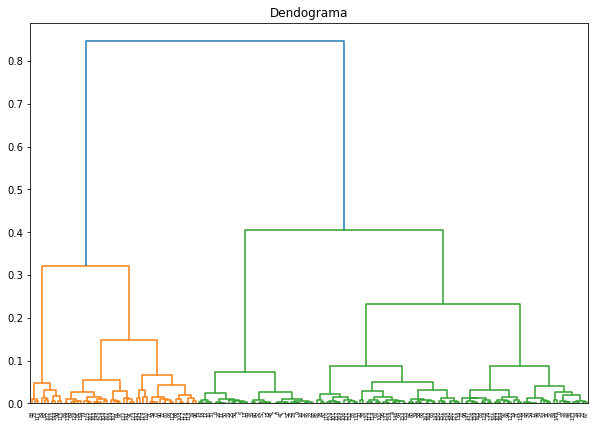

In [61]:
plt.figure(figsize=(10, 7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(X, method="ward"))

Creamos el modelo y lo entrenamos para trabajarlo

In [73]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="ward")
model.fit(X)
pred1 = model.fit_predict(X)

Graficamos en base al modelo creado en pasos anteriores para conocer la distribución de los datos en los clusteres indicados

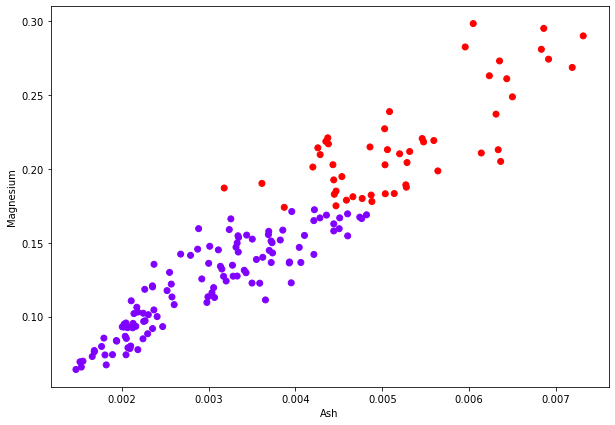

In [82]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 2], c=model.labels_, cmap='rainbow')
plt.xlabel("Ash")
plt.ylabel("Magnesium")
plt.show()

Usamos los datos seleccionados de manera aleatoria al inicio de este ejercicio para determinar el cluster en el cual estos se encuentran.

In [59]:
muestras_prediccion = model.fit_predict(muestras_escalada)

for i, pred in enumerate(muestras_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 1
Muestra 1 se encuentra en el clúster: 0
Muestra 2 se encuentra en el clúster: 0


En base a lo trabajado con este método de agrupamiento, vemos que la cantidad de clusteres es igual a 2. Concidentemente es el
mismo valor que calculamos en el ejercicio anterior. Como podemos apreciar en los gráficos, la distribución de los tipos de vinos nuevamente
recae en 2 tipos y tiende a seguir la misma clasificación que en el ejercicio anterior.

# Análisis Comparativo

Una vez trabajados los 2 métodos de agrupación podemos indicar que los resultados obtenidos en ambos fueron cercanamente similares.
Sin embargo, el método de agrupamiento jerarquico se hace un poco más simple de visualizar y trabajar al momento de determinar los clusteres.
Es importante destacar que en este caso el segundo método se hizo un poco más corto y ligero, ya que en el primero se realizo todo el análisis preliminar
el cual nos permitió determinar con que columnas trabajaremos y la limpieza de estos.
